### 1. Importation de packages

In [1]:
#Importion des packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import warnings
warnings.filterwarnings('ignore')

### 2. Chargement de données

In [2]:
#Chargement des données
data = pd.read_csv("Book1.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 3. Analyse de données

In [3]:
data.shape

(45211, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data['age'].value_counts()

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
95       2
93       2
92       2
88       2
94       1
Name: count, Length: 77, dtype: int64

In [7]:
data['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [8]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [9]:
data['housing'].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [10]:
data['loan'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
Transform1 = LabelEncoder()
data['age'] = Transform1.fit_transform(data['age'])
data['job'] = Transform1.fit_transform(data['job'])
data['marital'] = Transform1.fit_transform(data['marital'])
data['education'] = Transform1.fit_transform(data['education'])
data['default'] = Transform1.fit_transform(data['default'])
data['balance'] = Transform1.fit_transform(data['balance'])
data['housing'] = Transform1.fit_transform(data['housing'])
data['loan'] = Transform1.fit_transform(data['loan'])
data['contact'] = Transform1.fit_transform(data['contact'])
data['day'] = Transform1.fit_transform(data['day'])
data['month'] = Transform1.fit_transform(data['month'])
data['duration'] = Transform1.fit_transform(data['duration'])
data['campaign'] = Transform1.fit_transform(data['campaign'])
data['pdays'] = Transform1.fit_transform(data['pdays'])
data['previous'] = Transform1.fit_transform(data['previous'])
data['poutcome'] = Transform1.fit_transform(data['poutcome'])
data['y'] = Transform1.fit_transform(data['y'])

<Axes: >

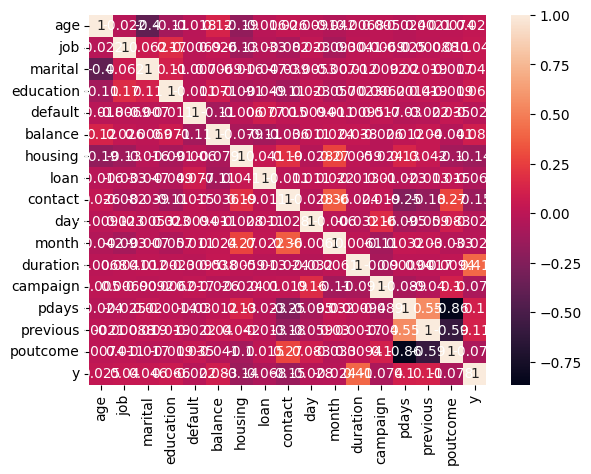

In [13]:
sns.heatmap(data.corr(), annot = True)

In [14]:
data.corr().y.sort_values(ascending=False)

y            1.000000
duration     0.407875
previous     0.114407
pdays        0.101449
balance      0.082873
education    0.066241
marital      0.045588
job          0.040438
age          0.025130
default     -0.022419
month       -0.024471
day         -0.028348
loan        -0.068185
campaign    -0.073525
poutcome    -0.077840
housing     -0.139173
contact     -0.148395
Name: y, dtype: float64

### 4. Division de donnéess d'entrainement

In [15]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train,X_test,y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=35)

### 5. Standarisation des données

In [16]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 6. Construction du modèle de Deep Learning

In [17]:
# Création d'une instance de la classe Sequential
model_dnn = Sequential()

In [24]:

# Création d'une instance de la classe Sequential
model_dnn = Sequential()

# Ajout des couches
model_dnn.add(Dense(512, input_shape=(16,), activation='relu'))
model_dnn.add(Dropout(0.3))
model_dnn.add(Dense(256, activation='relu'))
model_dnn.add(Dropout(0.4))
model_dnn.add(Dense(128, activation='relu'))

model_dnn.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model_dnn.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Affichage de l'architecture du réseau de neurones
model_dnn.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,057 (676.00 KB)

 Trainable params: 173,057 (676.00 KB)

 Non-trainable params: 0 (0.00 B)

### 7. Entraiment du modèle Deep Learning

In [25]:
# Entrainement du modele
history = model_dnn.fit(X_train, y_train, epochs=150, verbose=1, validation_data=(X_test, y_test))

Epoch 1/150
989/989 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8894 - loss: 0.2744 - val_accuracy: 0.8994 - val_loss: 0.2392
Epoch 2/150
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8952 - loss: 0.2434 - val_accuracy: 0.8994 - val_loss: 0.2334
Epoch 3/150
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8988 - loss: 0.2377 - val_accuracy: 0.9014 - val_loss: 0.2298
Epoch 4/150
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8981 - loss: 0.2336 - val_accuracy: 0.9024 - val_loss: 0.2299
Epoch 5/150
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9001 - loss: 0.2321 - val_accuracy: 0.9014 - val_loss: 0.2275
Epoch 6/150
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9028 - loss: 0.2289 - val_accuracy: 0.9006 - val_loss: 0.2264
Epoch 7/150
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8985 - loss: 0.2333 - val_accuracy: 0.8997 - val_loss: 0.2263
Epoch 8/150
989/989 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9042 - loss: 0.2208 - val_accu

### 8. Validation du modèle

In [20]:
model_dnn.evaluate(X_test, y_test)

424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.9021 - loss: 0.2190


[0.21701553463935852, 0.9024624228477478]

In [26]:
## Visualisation de l'évolution d'entrainnement du réseau de neurone
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

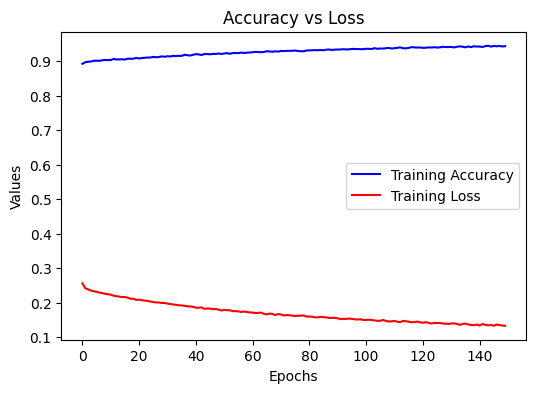

In [27]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Accuracy vs Loss')
plt.legend()
plt.show()

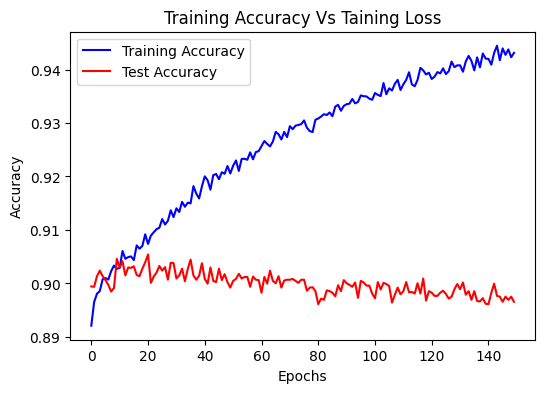

In [37]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

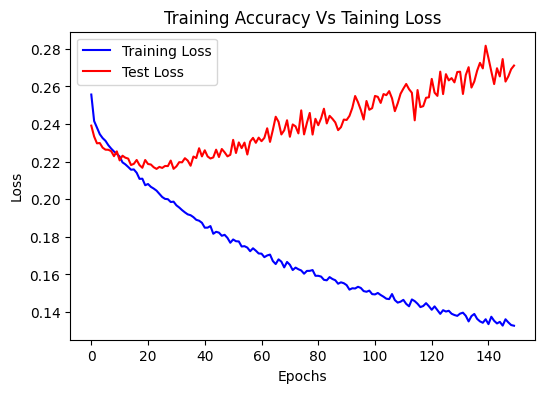

In [31]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

### 9. Prédiction simple

In [35]:
pred_y = model_dnn.predict(X_test)
pred_y

424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step


array([[7.2105765e-01],
       [5.5895107e-08],
       [0.0000000e+00],
       ...,
       [1.2063765e-07],
       [1.6079618e-03],
       [2.4755448e-10]], dtype=float32)